<img src="imgs/Adevinta-ULPGC-logo.jpg" width="530px" align="right">

# **NOTEBOOK 3**

## **Entropía**

La expresión de la **entropía** tiene la siguiente forma:

$$ H(X) = - \sum_i P(x_i)\log_2{P(x_i)} $$

Veámos qué significa esta fórmula.

Podríamos entender la entropía como la cantidad de información que, de promedio, circula por un canal. Por ejemplo, supongamos que tenemos un conjunto de cuatro símbolos *a*, *b*, *c* y *d* que circulan por un canal formando un mensaje. Si queremos codificar esos cuatro símbolos deberemos usar dos bits. Supongamos también que las probabilidades de aparición de cada uno de ellos es de $0.25$. 

In [56]:
import numpy as np
import math

symbols = ['a', 'b', 'c', 'd']
symbols_prob = [0.25, 0.25, 0.25, 0.25]

symbols_dict = {
    'a': '00',
    'b': '01',
    'c': '10',
    'd': '11',
}

numbers_of_symbols_in_message = 1_000_000

message = np.random.choice(symbols, numbers_of_symbols_in_message, p=symbols_prob)
print(message[:50])

code = ""
for e in message:
    code += symbols_dict[e]

print("Longitud del mensaje:", len(code), "bits")
print("Número promedio de bits por símbolo:", np.round(len(code)/numbers_of_symbols_in_message, 2), "bits")

['a' 'a' 'b' 'a' 'c' 'c' 'c' 'b' 'a' 'b' 'c' 'c' 'd' 'c' 'a' 'a' 'c' 'b'
 'a' 'd' 'a' 'b' 'd' 'b' 'b' 'c' 'a' 'd' 'd' 'b' 'a' 'a' 'b' 'c' 'd' 'b'
 'a' 'd' 'b' 'b' 'c' 'c' 'a' 'c' 'b' 'c' 'b' 'd' 'd' 'd']
Longitud del mensaje: 2000000 bits
Número promedio de bits por símbolo: 2.0 bits


Mediante esta codificación tenemos que la cantidad de dígitos binarios que circulan por el canal corresponde al número de símbolos enviados por dos. Si el mensaje contiene veinte símbolos, la cantidad de dígitos será cuarenta. En otras palabras, la cantidad de dígitos binarios (bits) por símbolo es dos.

<div align="center">
    <img src="imgs/binaria.svg" width="330px">
</div>

Pero, ¿qué ocurre si la probabilidad de aparición de cada uno de los símbolos no fuera la misma? Supongamos ahora que la probabilidad de cada símbolo es, para: <code>['a', 'b', 'c', 'd']</code>, la siguiente: <code>[0.5, 0.25, 0.125, 0.125]</code>. Si utilizáramos otra codificación distinta, el número de bits promedio por símbolo se podría reducir. Consideremos la siguiente codificación: <code>'a': '0', 'b': '10', 'c': '110','d': '111'</code>. ¿Qué pasaría si generáramos un millón de símbolos?

In [52]:
import numpy as np
import math

symbols = ['a', 'b', 'c', 'd']
symbols_prob = [0.5, 0.25, 0.125, 0.125]

symbols_dict = {
    'a': '0',
    'b': '10',
    'c': '110',
    'd': '111',
}

numbers_of_symbols_in_message = 1_000_000

message = np.random.choice(symbols, numbers_of_symbols_in_message, p=symbols_prob)

print(message[:50])

code = ""
for e in message:
    code += symbols_dict[e]

print(code[:50])

print("Longitud del mensaje:", len(code), "bits")
print("Número promedio de bits por símbolo:", np.round(len(code)/numbers_of_symbols_in_message, 2), "bits")

['a' 'b' 'b' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'b' 'a' 'd' 'a' 'b' 'a' 'c' 'b'
 'a' 'a' 'b' 'd' 'a' 'b' 'a' 'b' 'a' 'b' 'a' 'c' 'd' 'a' 'c' 'a' 'a' 'a'
 'b' 'a' 'a' 'a' 'a' 'b' 'b' 'a' 'b' 'a' 'a' 'a' 'a' 'a']
01010000000010011101001101000101110100100100110111
Longitud del mensaje: 1750485 bits
Número promedio de bits por símbolo: 1.75 bits


Esta nueva forma de codificar reduce la cantidad de bits necesarios.

<div align="center">
    <img src="imgs/huffman.svg" width="330px">
</div>

La regla, por tanto, debe ser algo así como 

    "A mayor probabilidad de aparición de un símbolo, menor número de bits para su representación"

Démonos cuenta de que es eso lo que intenta reflejar la fórmula de la entropía. En la figura anterior observamos que en la raíz del árbol, el cual representa nuestra codificación, nos podemos encontrar un 0 o un 1. Si es un 0 ya sabemos que el símbolo actual es una 'a'. Si es un 1 debemos esperar al siguiente bit para determinar cuál es el nuevo símbolo. Si es un 0 ya sabemos que corresponde a una 'b'. Si es un 1, de nuevo tendremos que esperar al siguiente bit. Y así, sucesivamente. 

Empezamos a verle ahora el sentido a la fórmula de la entropía. La parte $-log_2(P(x_i))$ corresponde al número de bits que debemos asociar a cada símbolo en función de la probabilidad que tenga. $-log_2(0.5) = 1, -log_2(0.25) = 2, -log_2(0.125) = 3, \dots $ Y la parte $P(x_i)$ corresponde a la probabilidad en que esas cantidades de bits por símbolo se darán en el mensaje. Por tanto, para este ejemplo la entropía será:

$$ E = - \sum_i P(x_i)\log_2{P(x_i)} = 0.5 \cdot \log_2(0.5) + 0.25 \cdot \log_2(0.25) +0.125 \cdot \log_2(0.125) +0.125 \cdot \log_2(0.125) = 1.75$$

¿Qué ocurriría con un nuevo conjunto de probabilidades? Cada símbolo lo tenemos que codificar con un número entero de bits, por tanto, para cualquier nuevo conjunto de probabilidades el procedimiento consistiría en ordenar los símbolos por sus probabilidades (de mayor a menor) para ir creando el árbol de codificación. Veamos qué obtendríamos:

In [51]:
import numpy as np
import math

def ce(p: list) -> float:
    return -np.sum(p * np.log2(p))

symbols = ['a', 'b', 'c', 'd']

symbols_prob = [0.5, 0.25, 0.125, 0.125]
# symbols_prob = [0.75, 0.15, 0.05, 0.05]
# symbols_prob = [0.90, 0.05, 0.025, 0.025]

for s, e in zip(symbols, symbols_prob):
    print("El símbolo",s,"se debe codificar con", np.round(-math.log(e, 2), 3),"bits.")

symbols_dict = {
    'a': '0',
    'b': '10',
    'c': '110',
    'd': '111',
}


print(message[:50])
print("Entropía:", np.round( ce(symbols_prob), 3), "bits")

numbers_of_symbols_in_message = 1_000_000
message = np.random.choice(symbols, numbers_of_symbols_in_message, p=symbols_prob)

code = ""
for e in message:
    code += symbols_dict[e]

print("Longitud del mensaje:", len(code), "bits")
print("Número promedio de bits por símbolo:", len(code)/numbers_of_symbols_in_message)

El símbolo a se debe codificar con 1.0 bits.
El símbolo b se debe codificar con 2.0 bits.
El símbolo c se debe codificar con 3.0 bits.
El símbolo d se debe codificar con 3.0 bits.
['a' 'a' 'b' 'b' 'a' 'd' 'a' 'b' 'a' 'a' 'a' 'a' 'b' 'a' 'a' 'd' 'c' 'a'
 'd' 'b' 'a' 'a' 'b' 'b' 'd' 'a' 'a' 'a' 'd' 'a' 'a' 'a' 'b' 'd' 'd' 'd'
 'd' 'd' 'a' 'a' 'a' 'a' 'd' 'b' 'b' 'b' 'a' 'a' 'a' 'a']
Entropía: 1.75 bits
Longitud del mensaje: 1750106 bits
Número promedio de bits por símbolo: 1.750106



Por tanto, podemos establecer que:

>   la **entropía** nos dice cuál es la cantidad mínima de bits promedio para codificar un mensaje. Pero ojo! No nos dice cuál es el esquema óptimo de codificación que necesitaríamos.



### **Entropía en diferentes distribuciones**

Veamos ahora cómo se comporta la entropía en diferentes distribuciones de probabilidad.

In [1]:
import numpy as np

def entropy(p) -> float:
    return -np.sum(p * np.log2(p))  # Cambia el logaritmo a base natural: np.log(p) y fíjate qué pasa.

Veamos cómo es la gráfica de una distribución de dos símbolos a medida que sus probabilidades van variando de 0 a 1.

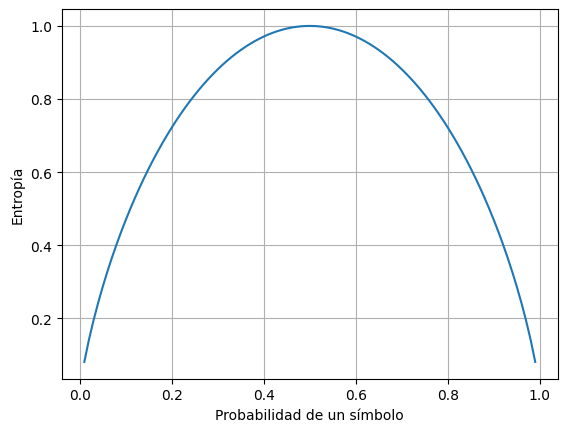

In [2]:
import matplotlib.pyplot as plt

p = np.arange(0.01, 1, 0.01)
H = [h for h in map(lambda x: entropy([x, 1-x]), p)]
plt.plot(p, H)
plt.xlabel('Probabilidad de un símbolo')
plt.ylabel('Entropía')
plt.grid()
plt.show()


In [12]:

P0 = [0.5, 0.5]  # Dos valores equiprobables
P1 = [0.25]*4  # Cuatro valores equiprobables
P2 = [0.125]*8  # Ocho valores equiprobables
P3 = [0.9] + [0.1/7]*7  # Un valor con probabilidad 0.9 y los demás equiprobables
P4 = [0.99] + [0.01/7]*7  # Un valor con probabilidad 0.99 y los demás equiprobables
P5 = [0.99/4]*4 + [0.01/4]*4  # Cuatro valores con probabilidad 0.99/4 y los demás con probabilidad 0.01/4

print("Entropía de P0:", entropy(P0))
print("Entropía de P1:", entropy(P1))
print("Entropía de P2:", entropy(P2))
print("Entropía de P3:", entropy(P3))
print("Entropía de P4:", entropy(P4))
print("Entropía de P5:", entropy(P5))

Entropía de P0: 1.0
Entropía de P1: 2.0
Entropía de P2: 3.0
Entropía de P3: 0.7497310857950417
Entropía de P4: 0.10886668511648723
Entropía de P5: 2.080793135895911


---

### Ejercicios

- En el código anterior, ¿qué entropía nos resulta al cambiar unas probabilidades por otras?
- ¿Qué ocurriría si cambiáramos la cantidad de bits para la codificación de cada símbolo  $\log_2{p(x_i)}$  por otra? ¿Qué valor obtendríamos para el entropía?
- ¿Qué significa que la entropía pueda ser menor que el número promedio de bits por símbolo?
- ¿A qué corresponde cada sumando de la fórmula de la entropía?

---

### Resolución del segundo apartado

In [3]:
# Apartado 2

import numpy as np
import math

def ce(p1: list, p2: list) -> float:
    return -np.sum(p1 * np.log2(p2))

symbols = ['a', 'b', 'c', 'd']
symbols_P = [0.5, 0.25, 0.125, 0.125]  # Probabilidades reales de aparición de los símbolos
symbols_Q = [0.90, 0.05, 0.025, 0.025]  # Otras probabilidades de aparición distinas para los símbolos

print("Entropía para P:", np.round( ce(symbols_P, symbols_P), 3), "bits")
print("P, Q:", np.round( ce(symbols_P, symbols_Q), 3), "bits. Con otras probabilidades.")
print("----")
print("Entropía para Q:", np.round( ce(symbols_Q, symbols_Q), 3), "bits")
print("Q, P:", np.round( ce(symbols_Q, symbols_P), 3), "bits. Con otras probabilidades.")

Entropía para P: 1.75 bits
P, Q: 2.487 bits. Con otras probabilidades.
----
Entropía para Q: 0.619 bits
Q, P: 1.15 bits. Con otras probabilidades.


Vemos que la codificación óptima para los símbolos la da la expresión de la entropía. Por cierto, el cálculo que hemos hecho mezclando las dos distribuciones de probabilidad distintas se llama **entropía cruzada**.

## **Entropía cruzada**

La **entropía cruzada** es un concepto de la teoría de la información que mide la diferencia entre dos distribuciones de probabilidad.

$$ H(P,Q) = - \sum_i P(x_i) \cdot \log_2{Q(x_i)} $$

Solo cuando las dos distribuciones son iguales, la entropía cruzada es igual a la entropía. La entropía cruzada alcanza su mínimo cuando las dos distribuciones son iguales.

Es importante también tener en cuenta que:

$$ H(P,Q) \neq H(Q,P) $$

La entropía cruzada es muy utilizada en el campo del aprendizaje automático. En este campo, la entropía cruzada se utiliza para medir la diferencia entre la distribución de probabilidad que genera un modelo y la distribución de probabilidad real de los datos. En este caso, la entropía cruzada se llama **pérdida de entropía cruzada**.

## **Divergencia Kullback-Leibler**

Es una medida no simétrica de la similitud o diferencia entre dos funciones de distribución de probabilidad P y Q.

$$ D_{KL}(p \parallel q) = \sum_i P(x_i)\ln{\frac{P(x_i)}{Q(x_i)}} $$

Podemos reescribir la expresión anterior de esta manera:

$$ D_{KL}(P \parallel Q) = \sum_i P(x_i) [\ln{P(x_i)} - \ln{Q(x_i)}] $$

Y también de esta otra:

$$ D_{KL}(P \parallel Q) = \sum_i P(x_i) \cdot \ln{P(x_i)} - \sum_i P(x_i) \cdot \ln{Q(x_i)} $$

Por tanto vemos que la divergencia Kullback-Leibler es la diferencia entre la entropía de P y la entropía cruzada de P y Q. Es decir, se hará cero cuando las dos distribuciones sean iguales.

Entre las propiedades más importantes de la divergencia Kullback-Leibler tenemos:

1. **No negatividad**: La divergencia KL siempre es no negativa, es decir, $ D_{\text{KL}}(P || Q) \geq 0 $. Esto se deriva del hecho de que el logaritmo de un número mayor que 1 es positivo.

2. **No simetría**: La divergencia KL no es simétrica, lo que significa que $ D_{\text{KL}}(P || Q) $ no es igual a $ D_{\text{KL}}(Q || P) $. Esto implica que la divergencia de $ P $ a $ Q $ puede ser muy diferente de la divergencia de $ Q $ a $ P $.

3. **Cero si y solo si las distribuciones son idénticas**: $ D_{\text{KL}}(P || Q) = 0 $ si y solo si $ P $ y $ Q $ son iguales en todos los puntos donde $ P $ es no nula. Esto significa que la única manera de que no haya "pérdida de información" al usar $ Q $ para aproximar $ P $ es que ambas distribuciones sean idénticas.

4. **No es una distancia**: La divergencia KL no es una distancia porque no es simétrica y no satisface la desigualdad triangular. 


Por tanto, la divergencia *Kullback-Leibler* nos indica la diferencia (divergencia) entre dos distribuciones de probabilidad basada en la diferencia entre la entropía de la primera de las distribuciones de probabilidad y la entropía cruzada entre la primera y la segunda.

$$ D_{KL}(P \parallel Q) = -H(P) + H(P,Q)  $$